<a href="https://colab.research.google.com/github/rpasquini/econometria-iae/blob/main/CEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hola')

hola


# Introducción
En este notebook introduciremos algunas de las principales librerías con las que vamos a estar trabajando.

## Donde estamos
Nuestro ambiente de trabajo ahora es un notebook que permite correr codigo, procesar datos, imprimir gráficos, etc. Estos notebooks en general se conocen como "Jupyter notebooks" y tienen como particularidad que el entorno visual en el que trabajan vive en el navegador. En este momento además, el notebook con el que trabajan "vive en la nube" de Google Colaboratory. Utiliza recursos de la nube de Google para procesar los datos, etc. Para trabajar con nuestros propios datos tendremos que hacerlos accesibles a Google Colab (subiendo los datos al Colab o subiendo los datos a otro servidor al cual las librerias que usemos puedan acceder)

Comentarios relacionados:

* Como dijimos el notebook es solo un entorno visual. En este notebook vamos a trabajar con librerias de análisis cuantitativo construidas sobre el lenguaje Python. Los notebooks de Colab tambien pueden correr código de R.

* Trabajar en la nube "Colab" es conveniente para una clase. También es posible (y a veces necesario) trabajar con un Jupyter Notebook instalado "localmente" en sus computadoras.

* El ambiente virtual provisto por Google Colab va a borrar todo el contenido que se aloje en la memoria virtual después de un rato de inactividad. Lo unico que se mantiene es lo que está escrito en el notebook (el codigo y el texto explicativo). Esto implica que el notebook debe contener todo el codigo desde la carga de los datos hasta su resultado final para que pueda ser reproducido en cualquier momento.

# Librerías con las que vamos a trabajar

Vamos a arrancar con estas:

- Pandas: Una de las principales librerías para trabajar y manipular datos en Python en forma tabular (llamados **dataframes** y usualmente abreviados **df**)
- Geopandas: Una libreria que busca ser similar a Pandas pero adaptada adicionalmente a  datos con una dimensión geográfica. A los objetos de geopandas los llamamos **geodataframes**.
- StatsModels: Una librería para procesamientos estadísticos.

Al respecto del uso de librerías, además debemos tener en cuenta:

- En general para usar las librerías tienen que estar *instaladas* y además *importadas * al ambiente de trabajo en el que estemos.
- Los Notebooks de Colab vienen con algunas librerías preinstaladas. Solo será necesario importarlas. Para las que no, será necesario instalarlas ( usando un comando de instalacion llamado *pip*).

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [5]:
df

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_a,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,0,16
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,0,16
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,0,16
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,0,357
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,5373,1,1,8,4,95,2,1,4,0,...,0,0,0,0,0,0,0,0,0,40
12497,5374,1,1,7,4,98,2,1,4,0,...,0,0,0,0,0,0,0,0,0,205
12498,5374,1,2,7,4,76,2,7,3,0,...,0,0,0,0,0,0,0,0,0,205
12499,5375,1,1,15,4,100,2,1,4,0,...,0,0,0,0,0,0,0,0,0,165


<Axes: >

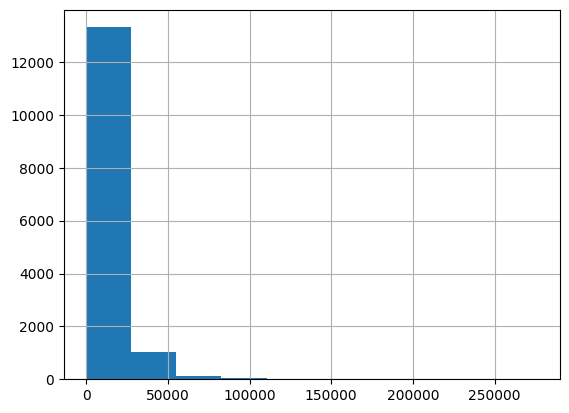

In [ ]:
df['ingtot_2'].hist()

In [ ]:
import numpy as np

In [ ]:
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

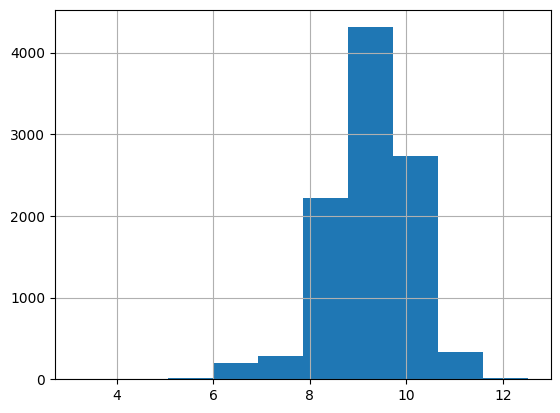

In [ ]:
df['logingreso'].hist()

In [ ]:
# dataframe
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,s8,sn14,sn16,s28,s29,fexp,sexotexto,inmigrante,logingreso,dsex
0,1,1,1,13,resto ciudad,18,mujer,1,6,95,...,2,0,Excelente,2,0,973,mujer,nativo arg,8.384804,1
1,2,1,1,1,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,115,varon,inmigrante,9.104980,0
2,3,1,1,6,inquilinatos hoteles inmuebles tomados,18,mujer,1,6,95,...,2,0,Excelente,2,0,223,mujer,inmigrante,8.482602,1
3,4,1,1,14,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,421,varon,nativo arg,9.615805,0
4,5,1,1,2,resto ciudad,18,varon,1,6,95,...,2,0,Bueno,0,0,199,varon,nativo arg,9.615805,0


In [ ]:
df.shape

(14512, 96)

In [ ]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a', 'p6_b', 'estado', 'categori', 't13',
       't14', 't18', 't28', 't29', 't29a', 't30', 'sem_hs', 't33', 't34',
       't35', 't37_cod_2', 't37_coda_2', 't38', 't39', 't40', 't41_cod_2',
       't47', 't48', 't51_bis', 'i1', 'i4', 'i6_3', 'i10', 'i11', 'codioph',
       'ioph_2', 'codioph_neto', 'ioph_neto_2', 'codios', 'ios_2', 'codioa',
       'ioa_2', 'codlab', 'inglab_2', 'codi3_1x', 'i3_1x_2', 'codi3_2x',
       'i3_2x_2', 'codi3_8x', 'i3_8x_2', 'codi3_est', 'i3_est_2', 'codi3_otr',
       'i3_otr_2', 'codnolab', 'ingnolab_2', 'coding', 'ingtot_2', 'codi_tot',
       'itfb_2', 'ipcfb_2', 'e2', 'e4', 'e6', 'e8', 'e12', 'e13', 'e14',
       'edad_30', 'nivel', 'aesc', 'm1', 'm1_2', 'm2_anio', 'm3_anio',
       'tipcob2_2', 'sn1_1', 'sn1_7', 'sn1_2', 'sn1_3', 'sn1_4', 'sn1_5', 's8',
       'sn14', 'sn16', 's28', 's29', 'fexp', 'sexotexto', 'inmigrante',
       'logingreso', 'dse

In [ ]:
df.logingreso

0        8.384804
1        9.104980
2        8.482602
3        9.615805
4        9.615805
           ...   
14507    8.748305
14508    9.952278
14509    9.210340
14510    8.922658
14511    9.190138
Name: logingreso, Length: 14512, dtype: float64

In [ ]:
df['logingreso']

0        8.384804
1        9.104980
2        8.482602
3        9.615805
4        9.615805
           ...   
14507    8.748305
14508    9.952278
14509    9.210340
14510    8.922658
14511    9.190138
Name: logingreso, Length: 14512, dtype: float64

<Axes: >

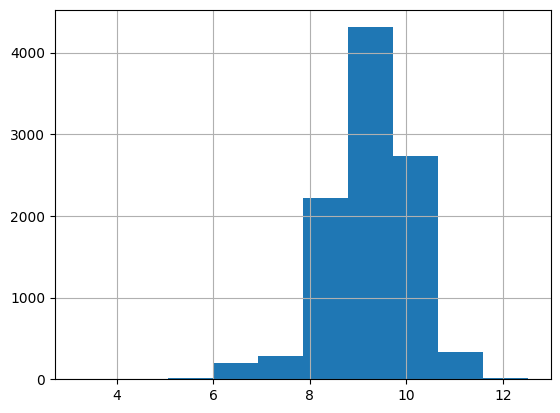

In [ ]:
df.logingreso.hist()

<Axes: >

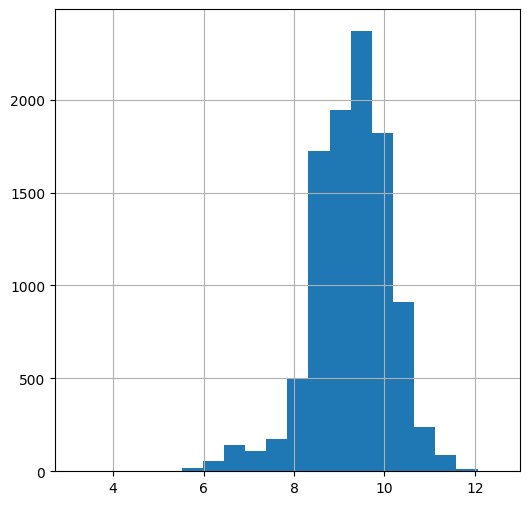

In [ ]:
# pueden agrandar el grafico usando lo siguiente:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
df.logingreso.hist(bins=20)

<Axes: >

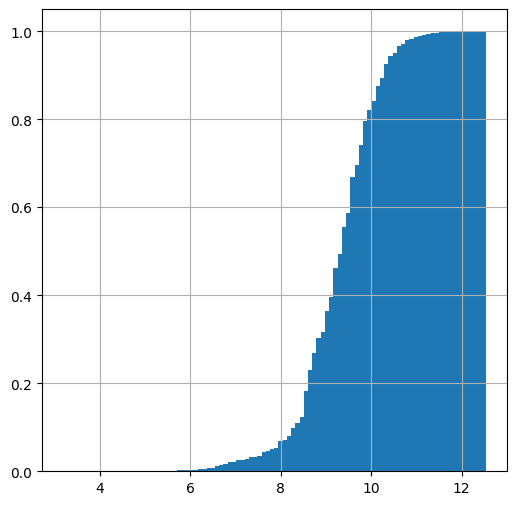

In [ ]:
df.logingreso.hist(cumulative=True, density=1, bins=100)

In [ ]:
df.logingreso.mean()

9.282120426552103

In [ ]:
df.sexo.unique()

array(['mujer', 'varon'], dtype=object)

# "Filtrando" el Dataframe
Seleccionamos las filas del dataframe en base a una condicion logica usando el método .loc \\
Dentro del .loc tenemos que especificar una condición lógica


Aqui van algunos ejemplos mas sobre como filtrar el dataframe

In [ ]:
# Ejemplo: promedio de logingreso de personas mayores a 40 años

df.loc[df.edad>=40].logingreso.mean()

9.35795335849025

In [ ]:
# Ejemplo: promedio de logingreso de varones y mayores a 40 años

df.loc[(df.sexo=='varon') & (df.edad>=40)].logingreso.mean()

9.55083188191198

In [ ]:
# Ejemplo: promedio de logingreso de varones o mayores a 40 años
df.loc[(df.sexo=='varon') | (df.edad>=40) ].logingreso.mean()

9.343912623487704

## Filtrando el dataframe


Para escribir una condicion recuerden que pueden utilizar los siguientes lógicos:

==    para chequear la  condicion "equivale a" o "igual a" va doble igual

!= distinto a

\> mayor a \\

\> = mayor o igual a

< menor a

<= menor o igual a

En el caso de querer usar dos condiciones o más:

(esta condicion) & (esta condicion) Se cumple esta condicion Y esta otra

(esta condicion) | (esta condicion) Se cumple esta condicion O esta otra

Recuerden que las condiciones tiene que ir en parentesis!





# Aplicando el CEF

Vamos a explorar ahore el ingreso esperado de varones y mujeres. Usando el modelo CEF tendríamos:

$$E[y|sexo=\text{varon}]$$

y

$$E[y|sexo=\text{mujer}]$$


In [ ]:
df.loc[df.sexo=='varon'].logingreso.mean()

9.444136001549921

In [ ]:
df.loc[df.sexo=='mujer'].logingreso.mean()

9.136385530108724

# Un metodo alternativo para contruir medias por grupos usando groupby

In [ ]:
df.groupby(by='sexo').mean()

<ipython-input-24-42d1897ee6f6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='sexo').mean()


,id,nhogar,miembro,comuna,edad,parentes_2,p5_2,p6_a,p6_b,categori,...,sn1_3,sn1_4,sn1_5,s8,sn14,s28,s29,fexp,logingreso,dsex
sexo,,,,,,,,,,,,,,,,,,,,,
mujer,2852.964830,1.009248,2.151101,7.184317,40.325257,2.296340,2.876254,12.131041,5.372932,1.252573,...,1.853849,1.989188,1.978116,1.908949,0.175980,1.16061,1.293213,212.14094,9.136386,1.0
varon,2673.230139,1.010534,2.113826,7.274177,36.435845,2.152451,2.696562,12.881200,5.168691,1.544843,...,1.860424,1.988588,1.981273,1.932114,0.123482,0.00000,0.000000,209.30256,9.444136,0.0


In [ ]:
df.groupby(by='sexo')['logingreso'].mean()

sexo
mujer    9.136386
varon    9.444136
Name: logingreso, dtype: float64

# Ejemplo más avanzado: creando una tabla de promedios y luego grafico las funciones CEF segun sexo y escolaridad

In [ ]:
df_means=df.groupby(['sexo','aesc'],as_index=False)['logingreso'].mean()
df_means=df_means.loc[df_means.aesc<20]
#.plot(x='aesc',y='logingreso')

<Axes: xlabel='aesc'>

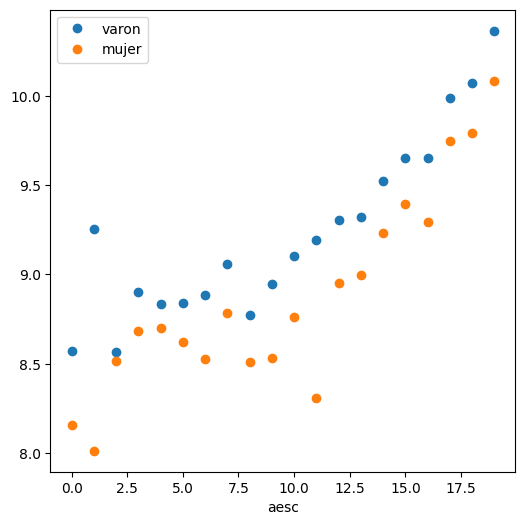

In [ ]:
import matplotlib.pyplot as plt
base=df_means.loc[df_means.sexo=='varon'].plot(x='aesc',y='logingreso', style='o', label='varon')
df_means.loc[df_means.sexo=='mujer'].plot(x='aesc',y='logingreso', style='o', ax=base, label='mujer')

Creando una variable dummy

In [ ]:
df.loc[df['sexo'] == 'varon', 'dmujer'] = 0
df.loc[df['sexo'] == 'mujer', 'dmujer'] = 1

## OLS

Statsmodels es la librería de operaciones estadísticas que usaremos para estimar OLS

In [ ]:
import statsmodels.api as sm

Estimar la regresion va a requerir varios pasos que voy a resumir en una funcion.

Asegurarme de que los datos (las filas en cuestion) que voy a estar usando no tienen datos missing en ninguna variable. \\
Separar a la variable a explicar (dependiente) de la(s) explicativas \\
Si la regresión va a tener una constante, como en nuestro caso, agregar a las variables explicativas una columna de 1s (unos). \\
Asignar a una variable el nombre del modelo y las especificaciones del mismo  \\
Correr el modelo con el metodo fit() y guardar los resultados en otra variable
Imprimir los resultados en pantalla (imprimir los contenidos de la variable del paso anterior)

In [ ]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())

In [ ]:
regress(['logingreso','dmujer'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     332.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.01e-73
Time:                        02:49:29   Log-Likelihood:                -12674.
No. Observations:               10113   AIC:                         2.535e+04
Df Residuals:                   10111   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4441      0.012    771.247      0.0

In [ ]:
df['dinmigrante'] = 0
df.loc[df['inmigrante'] == 'inmigrante', 'dinmigrante'] = 1

In [ ]:
df.loc[(df['sexo'] == 'varon')&(df['inmigrante'] != 'inmigrante')].logingreso.mean()

9.505091706288352

In [ ]:
df.loc[(df['sexo'] == 'mujer')&(df['inmigrante'] != 'inmigrante')].logingreso.mean()

9.209591040354109

In [ ]:
df.loc[(df['sexo'] == 'varon')&(df['inmigrante'] == 'inmigrante')].logingreso.mean()

9.261624758838526

In [ ]:
df.loc[(df['sexo'] == 'mujer')&(df['inmigrante'] == 'inmigrante')].logingreso.mean()

8.9385575657043

In [ ]:
regress(['logingreso','dmujer','dinmigrante'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     261.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.98e-111
Time:                        02:49:29   Log-Likelihood:                -12583.
No. Observations:               10113   AIC:                         2.517e+04
Df Residuals:                   10110   BIC:                         2.519e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5088      0.013    729.363      

In [ ]:
#prediccion para la mujer inmigrante
9.5088-0.3027-0.2583

8.9478

In [ ]:
df['dmujerinmigrante'] =df['dmujer']*df['dinmigrante']

In [ ]:
regress(['logingreso','dmujer','dinmigrante','dmujerinmigrante' ],data=df)
# me permite computar directamente el diferencial de la mujer inmigrante, que de otra manera quedaria resumido en el promedio

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     174.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.78e-110
Time:                        02:49:30   Log-Likelihood:                -12583.
No. Observations:               10113   AIC:                         2.517e+04
Df Residuals:                   10109   BIC:                         2.520e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.5051      0.014  

In [ ]:
9.5051-0.2955-0.2435-0.0276

8.938500000000001